# UNSUPERVISED LEARNING : CLUSTERING


# Comparing and Evaluating Clustering Algorithms

In [7]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

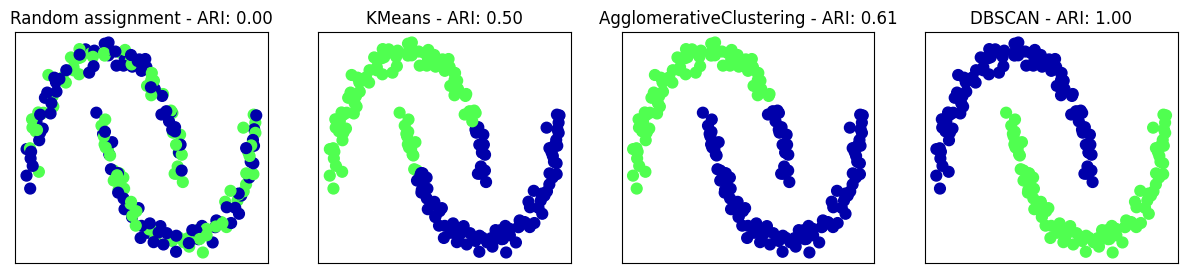

In [9]:



from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
 adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
 # plot the cluster assignments and cluster centers
 clusters = algorithm.fit_predict(X_scaled)
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
 cmap=mglearn.cm3, s=60)
 ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
 adjusted_rand_score(y, clusters)))

In [10]:
from sklearn.metrics import accuracy_score
# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


### Evaluating clustering without ground truth

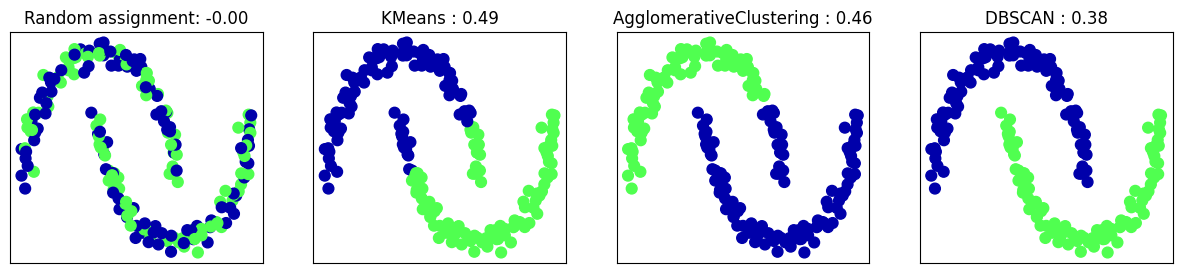

In [11]:

from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
 silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
 clusters = algorithm.fit_predict(X_scaled)
 # plot the cluster assignments and cluster centers
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
 s=60)
 ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
 silhouette_score(X_scaled, clusters)))

### Comparing algorithms on the faces dataset


In [13]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X_people = people.data

# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [14]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [15]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [16]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [17]:
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  26 1262]


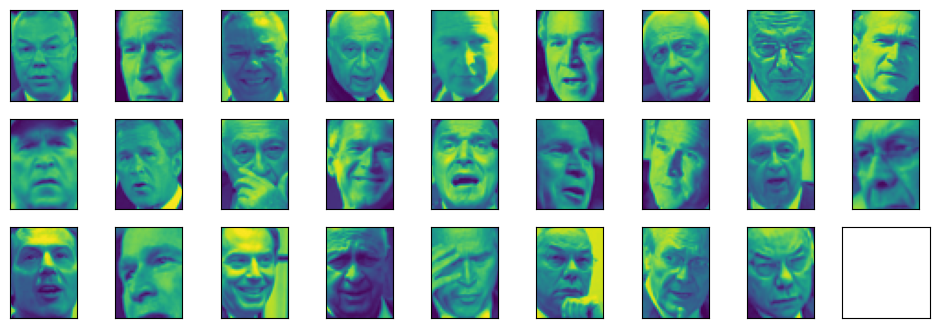

In [19]:
image_shape = (50, 37)

noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
 ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [20]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
 print("\neps={}".format(eps))
 dbscan = DBSCAN(eps=eps, min_samples=3)
 labels = dbscan.fit_predict(X_pca)
 print("Clusters present: {}".format(np.unique(labels)))
 print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Cluster sizes: [1288]

eps=3
Clusters present: [-1]
Cluster sizes: [1288]

eps=5
Clusters present: [-1]
Cluster sizes: [1288]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8]
Cluster sizes: [1198   59    3    3    5    4    3    7    3    3]

eps=9
Clusters present: [-1  0  1  2  3]
Cluster sizes: [723 556   3   3   3]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 262 1026]

eps=13
Clusters present: [-1  0]
Cluster sizes: [  83 1205]


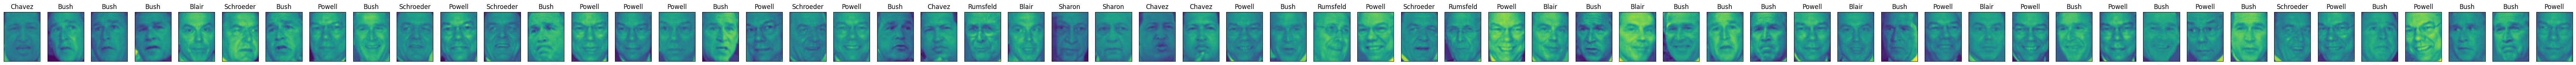

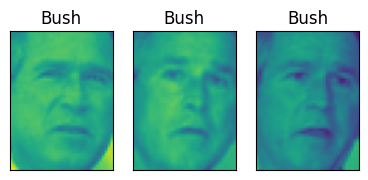

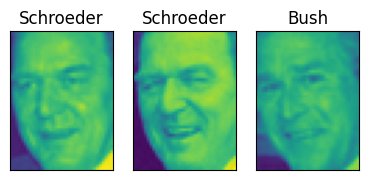

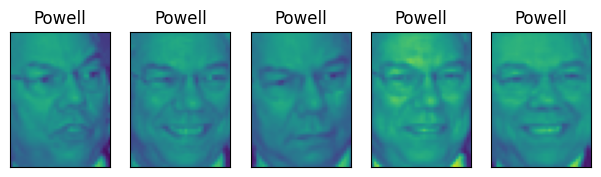

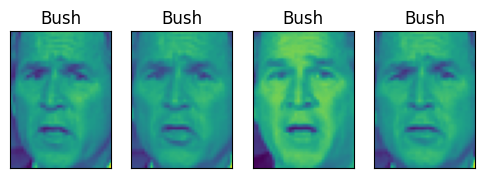

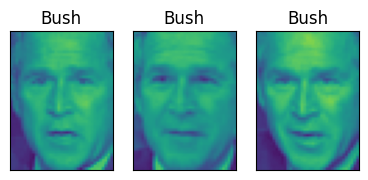

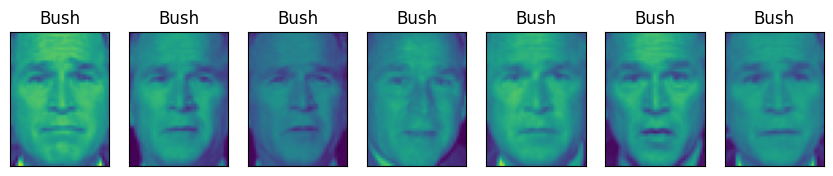

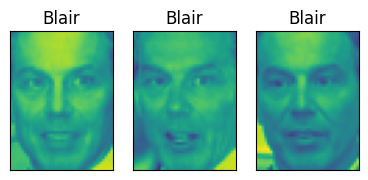

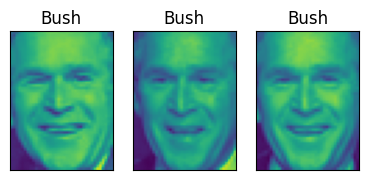

In [24]:
people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X_people = people.data
y_people = people.target 
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels) + 1):
 mask = labels == cluster
 n_images = np.sum(mask)
 fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
 subplot_kw={'xticks': (), 'yticks': ()})
 for image, label, ax in zip(X_people[mask], y_people[mask], axes):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
  ax.set_title(people.target_names[label].split()[-1])


In [25]:
# extract clusters with k-means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [  1 109 645 130   1   1 128 170   1 102]


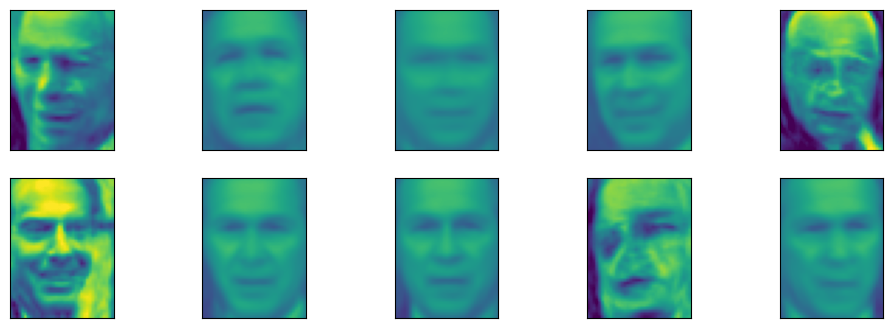

In [28]:

fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
 ax.imshow(pca.inverse_transform(center).reshape(image_shape),
 vmin=0, vmax=1)

In [32]:

people = fetch_lfw_people(min_faces_per_person=70)  # ← No resize
X_people = people.data
image_shape = people.images[0].shape  # This will be (87, 65)





# Analyzing the faces dataset with agglomerative clustering

In [34]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(
 np.bincount(labels_agg)))


Cluster sizes agglomerative clustering: [ 36 444 149 198 122  27 240  11  49  12]


In [35]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.06


Text(0, 0.5, 'Cluster distance')

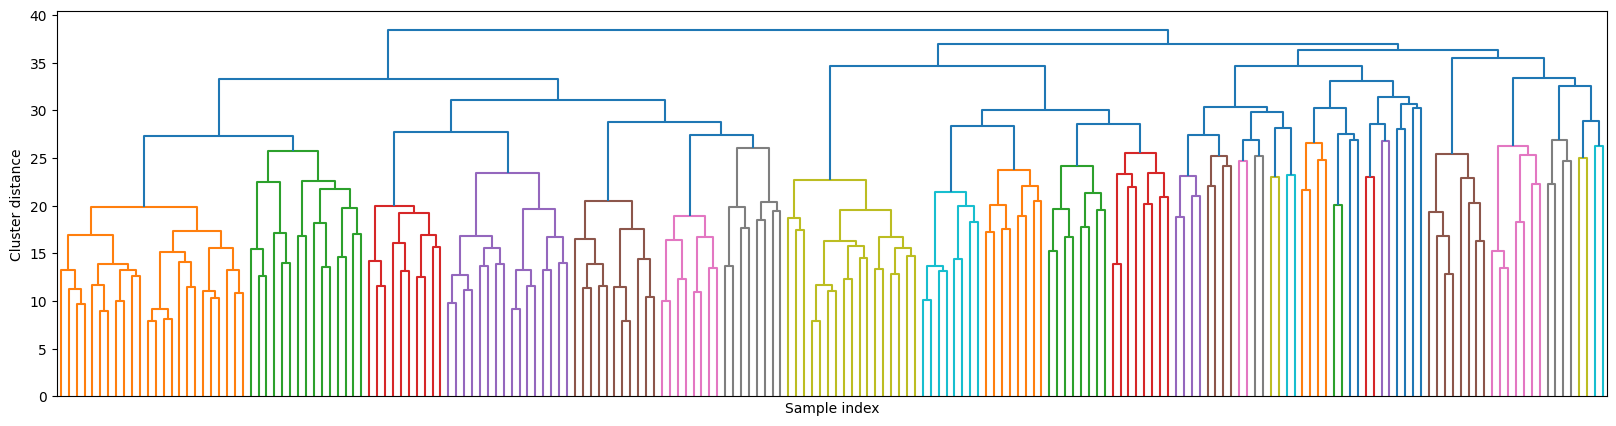

In [37]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_array = ward(X_pca)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

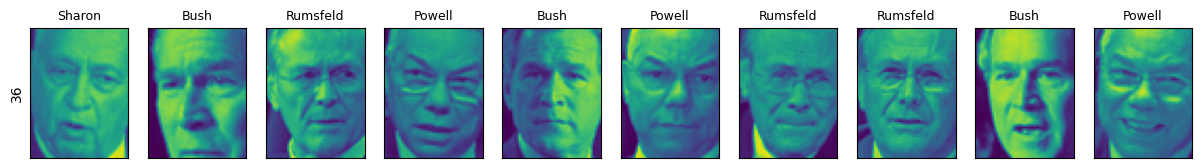

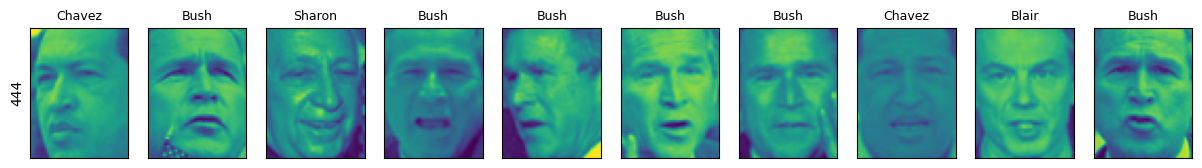

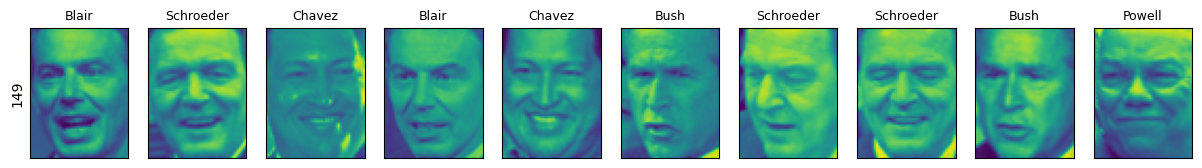

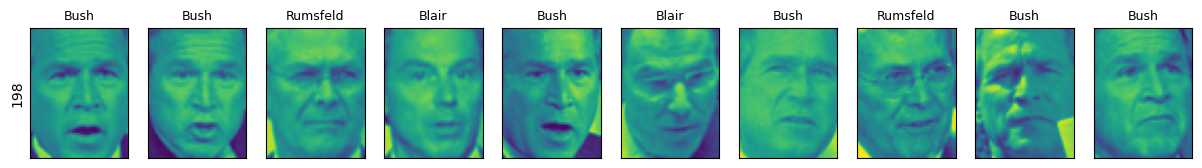

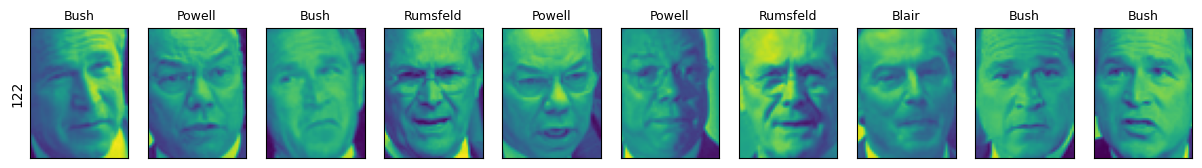

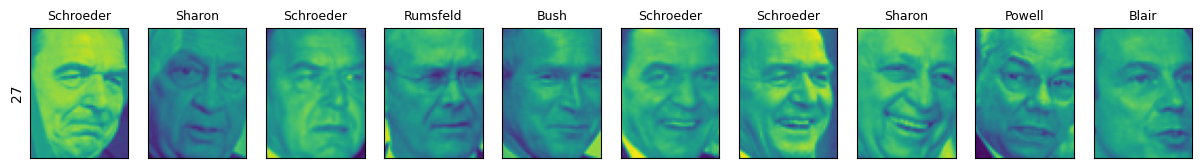

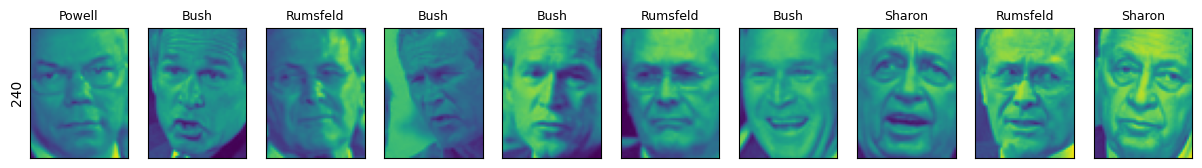

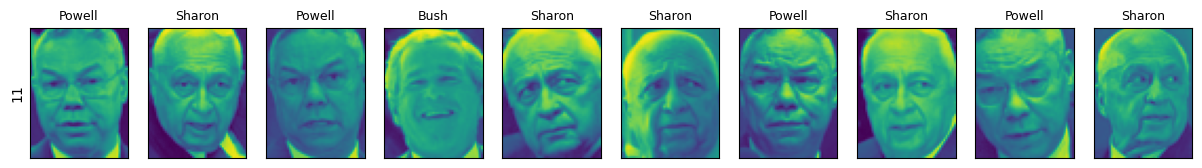

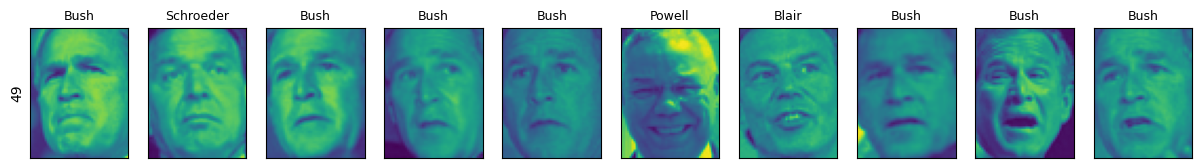

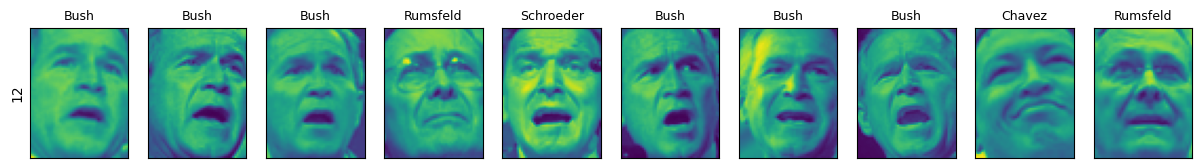

In [42]:
n_clusters = 10
for cluster in range(n_clusters):
 mask = labels_agg == cluster
 fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(15, 8))
 axes[0].set_ylabel(np.sum(mask))
 for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
  labels_agg[mask], axes):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
  ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
 

cluster sizes agglomerative clustering: [ 11  62  66 111  35  26  39  18  90  12  28  48  18  22  27  50  15  51
 101   4   2  13  15  27  32  22  22  21   5  22  29  31  31  18  27   3
  15 104  14   1]


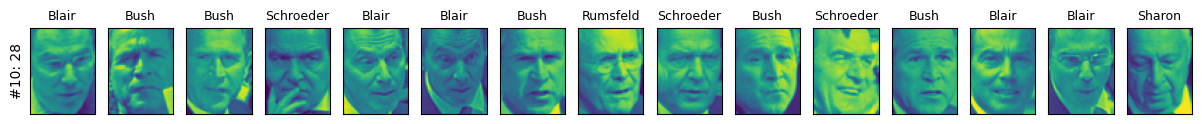

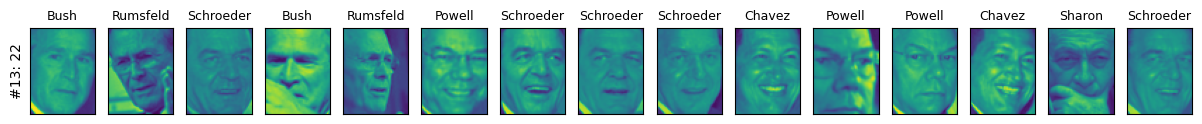

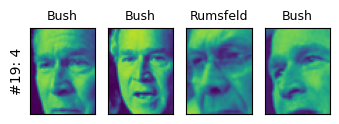

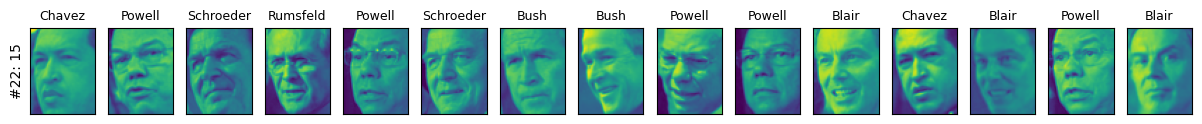

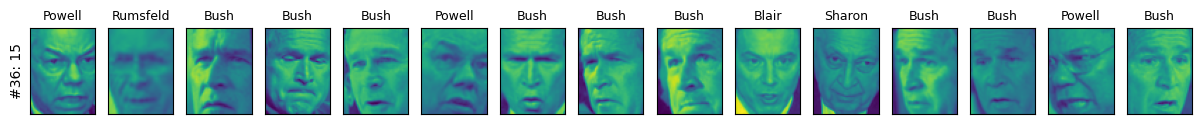

In [46]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
 mask = labels_agg == cluster
 fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(15, 8))
 cluster_size = np.sum(mask)
 axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
 for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
 labels_agg[mask], axes):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
  ax.set_title(people.target_names[label].split()[-1],
  fontdict={'fontsize': 9})
 for i in range(cluster_size, 15):
     axes[i].set_visible(False)

